In [13]:
import pandas as pd 

try: 
    df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError: 
    print("Error: 'in-vehicle-coupon-recommendation.csv' not found.")
    print("Ensure dataset is in the same directory as your noteboook.")

Dataset loaded successfully!


In [14]:
# Summary of contents using built-in pandas functions 

print("First 5 rows of the dataframe")
print(df.head())

print("\nDataset dimensions (rows, columns):", df.shape)

print("\nDataset information:")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nValue counts for some cateogrical columns:")
for col in ['passanger', 'coupon', 'gender', 'age', 'maritalStatus']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

First 5 rows of the dataframe
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN  

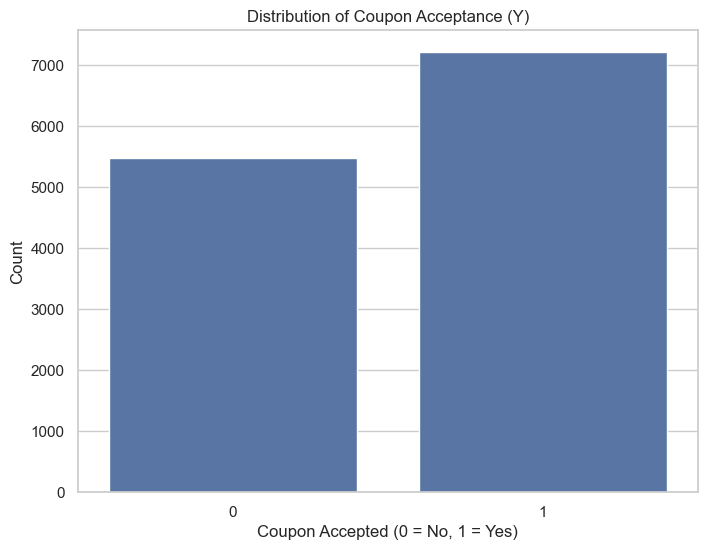

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="whitegrid")

# Count plot of the target variable 'Y'
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=df)
plt.title('Distribution of Coupon Acceptance (Y)')
plt.xlabel('Coupon Accepted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

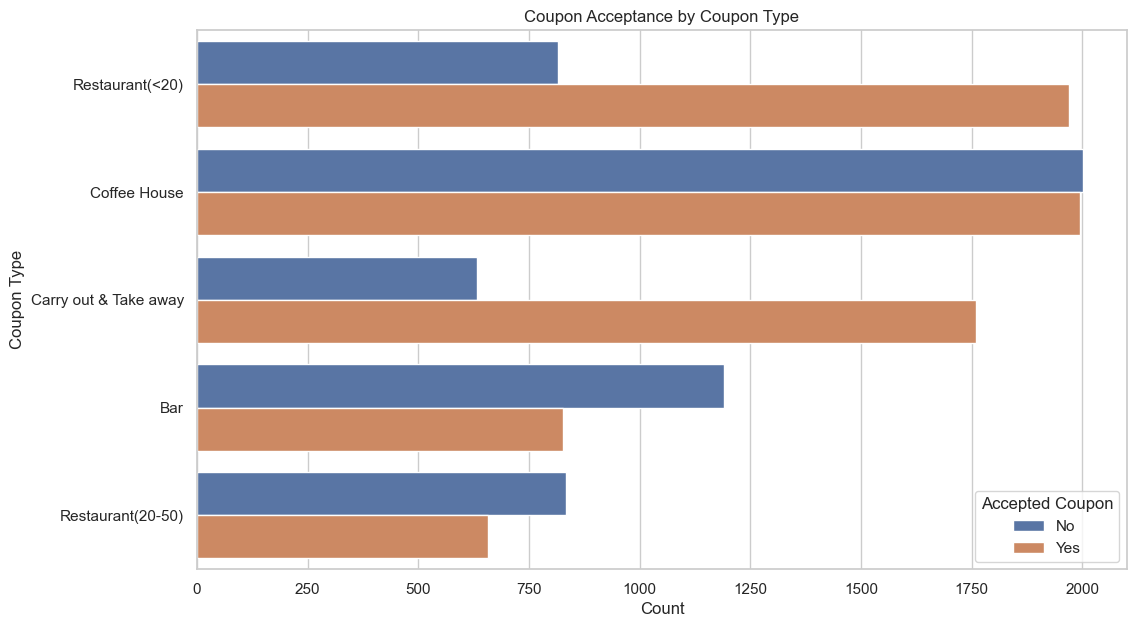

In [12]:
# Coupon acceptance by coupon type
plt.figure(figsize=(12, 7))
sns.countplot(y='coupon', hue='Y', data=df)
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.legend(title='Accepted Coupon', labels=['No', 'Yes'])
plt.show()


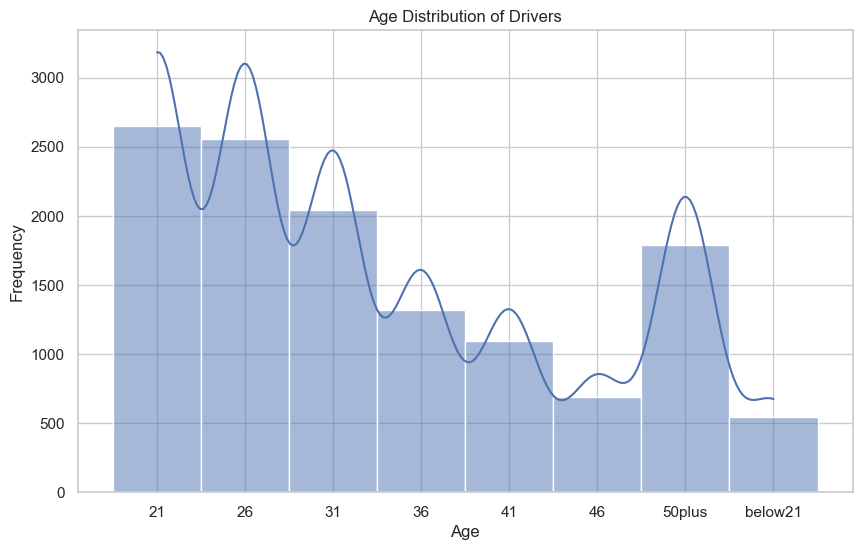

In [13]:
# Age distribution of drivers
# Histogram of the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].sort_values(), bins=20, kde=True)
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [20]:
print("Hypothesis of Interest: What is the true underlying acceptance rate (p) of coupons? Our parameter of interest is p, the probability that a randomly\nchosen driver will accept a coupon. This is a continuous parameter that can take any value between 0 and 1.")

Hypothesis of Interest: What is the true underlying acceptance rate (p) of coupons? Our parameter of interest is p, the probability that a randomly
chosen driver will accept a coupon. This is a continuous parameter that can take any value between 0 and 1.


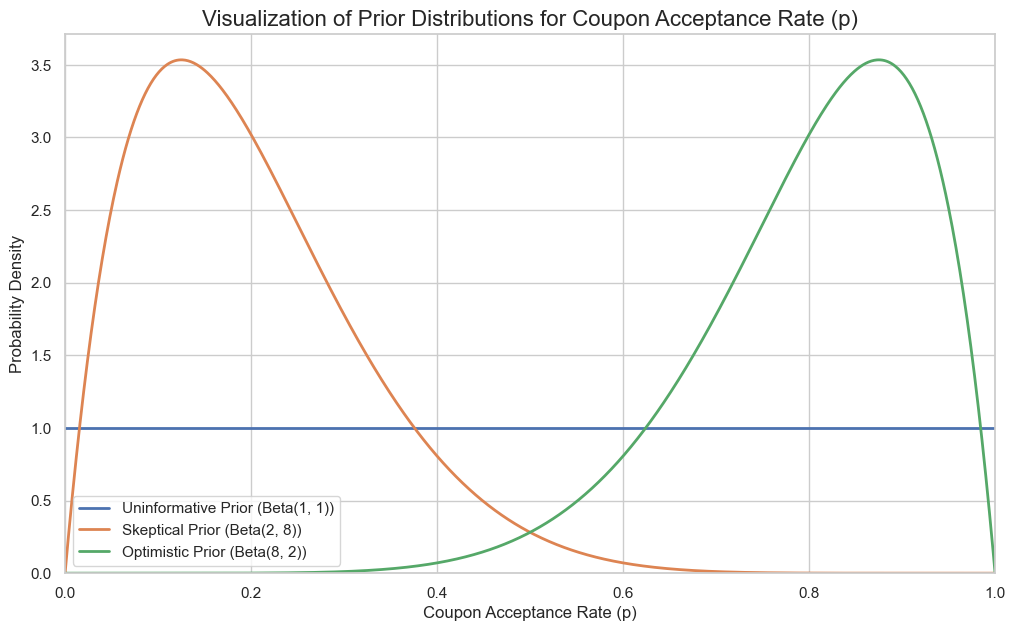

In [16]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Define the range of p (probability of acceptance)
p_values = np.linspace(0, 1, 1000)

# Define the parameters for our three priors
# (alpha, beta, label)
priors = [
    (1, 1, 'Uninformative Prior (Beta(1, 1))'),
    (2, 8, 'Skeptical Prior (Beta(2, 8))'),
    (8, 2, 'Optimistic Prior (Beta(8, 2))')
]

plt.figure(figsize=(12, 7))

for alpha_p, beta_p, label in priors:
    # probability density function (PDF) for the Beta distribution
    dist = stats.beta(alpha_p, beta_p)
    plt.plot(p_values, dist.pdf(p_values), label=label, lw=2)

plt.title('Visualization of Prior Distributions for Coupon Acceptance Rate (p)', fontsize=16)
plt.xlabel('Coupon Acceptance Rate (p)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=11)
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()

In [11]:
print("The plot above shows the beliefs encoded by each prior. The uninformative prior is the flat line, where no single value of p is more or less likely than any other. The skeptical prior has a peak at a low value and a tail extending to the right, indicating a belief that acceptance is unlikely but acknowledging it could be higher The optimistic prior is the mirror image, peaking at a high value and expressing a belief that acceptance is likely. For our analysis, we will use the Beta(1,1) uninformative prior because our initial belief is every possible value for the coupon acceptance rate, from 0% to 100% is equally likely. This represents maximum objectivity since it is the most neutral and unbiased stance. No personal information, hunches, expectations, or biases into the analysis is injected. Therefore, the final result will be driven by the evidence within the dataset itself, rather than preconceived notions.")

The plot above shows the beliefs encoded by each prior. The uninformative prior is the flat line, where no single value of p is more or less likely than any other. The skeptical prior has a peak at a low value and a tail extending to the right, indicating a belief that acceptance is unlikely but acknowledging it could be higher The optimistic prior is the mirror image, peaking at a high value and expressing a belief that acceptance is likely. For our analysis, we will use the Beta(1,1) uninformative prior because our initial belief is every possible value for the coupon acceptance rate, from 0% to 100% is equally likely. This represents maximum objectivity since it is the most neutral and unbiased stance. No personal information, hunches, expectations, or biases into the analysis is injected. Therefore, the final result will be driven by the evidence within the dataset itself, rather than preconceived notions.


In [18]:
# Total number of trials, (n), is the the total number of rows
n = len(df)
# Number of successes (k) s the count of rows where 'Y' is 1
k = df['Y'].sum()

print(f"Total number of coupon offers (n): {n}")
print(f"Number of coupons accepted (k): {k}")
print(f"Observed acceptance rate: {k/n:.4f}")

Total number of coupon offers (n): 12684
Number of coupons accepted (k): 7210
Observed acceptance rate: 0.5684


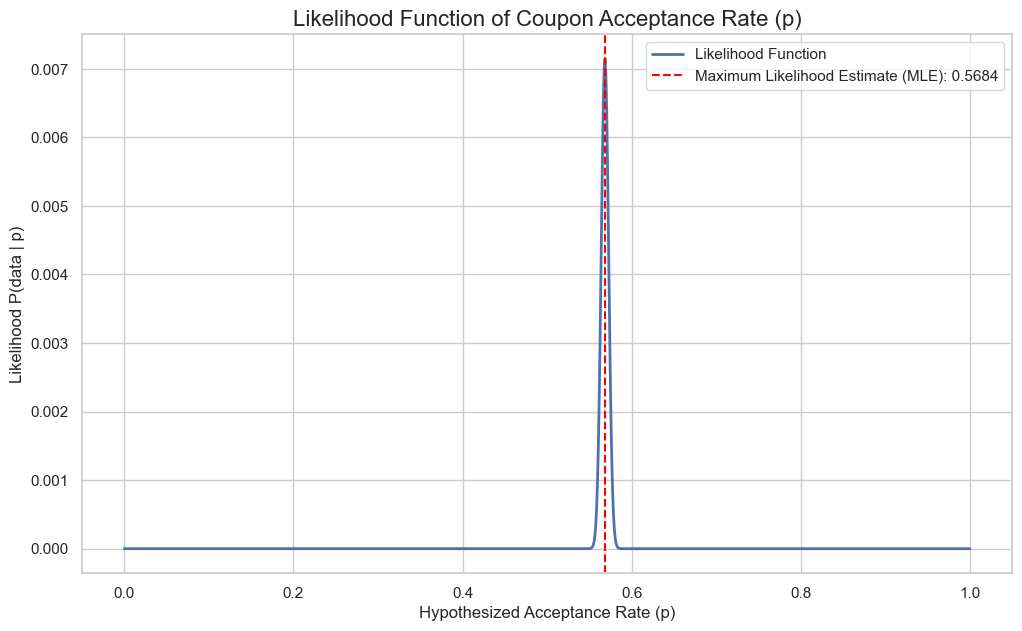

The Maximum Likelihood Estimate (MLE) for p is: 0.5684


In [19]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# n and k are from the previous step
n = 12684
k = 7210

# 1. Define a range of possible values for p (our hypothesis)
p_values = np.linspace(0, 1, 1000)

# 2. Calculate the likelihood for each value of p using the Binomial PMF
# We use log-likelihood for numerical stability, as likelihoods can be tiny.
# However, for visualization, we can plot the actual likelihood.
likelihoods = stats.binom.pmf(k, n, p_values)

# 3. Find the Maximum Likelihood Estimate (MLE)
mle_p = p_values[np.argmax(likelihoods)]
# The analytical MLE is simply k/n
mle_analytical = k / n

# 4. Visualize the likelihood function
plt.figure(figsize=(12, 7))
plt.plot(p_values, likelihoods, label='Likelihood Function', lw=2)

plt.axvline(mle_analytical, color='red', linestyle='--',
            label=f'Maximum Likelihood Estimate (MLE): {mle_analytical:.4f}')

plt.title('Likelihood Function of Coupon Acceptance Rate (p)', fontsize=16)
plt.xlabel('Hypothesized Acceptance Rate (p)', fontsize=12)
plt.ylabel('Likelihood P(data | p)', fontsize=12)
plt.legend(fontsize=11)
plt.show()

print(f"The Maximum Likelihood Estimate (MLE) for p is: {mle_analytical:.4f}")

In [24]:
print("The graph shows a sharply peaked function where the x-axis is the different possible values for the true acceptance rate p and the y-axis represents the likelihood of our observed data for each of these values of p. The function reaches its maximum value at approximately p = 0.5684. This is the Maximum Likelihood Estimate (MLE). So, Among all possible values for the true acceptance rate, p = 0.5684 makes the data we actually collected the most probable. The low likelihood values far from the MLE show the likelihood is virtually zero indicating that is extremely improbable we would have observed 7210 accepted coupons if the true underlying acceptance rate were only 20% or as high as 90%")

The graph shows a sharply peaked function where the x-axis is the different possible values for the true acceptance rate p and the y-axis represents the likelihood of our observed data for each of these values of p. The function reaches its maximum value at approximately p = 0.5684. This is the Maximum Likelihood Estimate (MLE). So, Among all possible values for the true acceptance rate, p = 0.5684 makes the data we actually collected the most probable. The low likelihood values far from the MLE show the likelihood is virtually zero indicating that is extremely improbable we would have observed 7210 accepted coupons if the true underlying acceptance rate were only 20% or as high as 90%


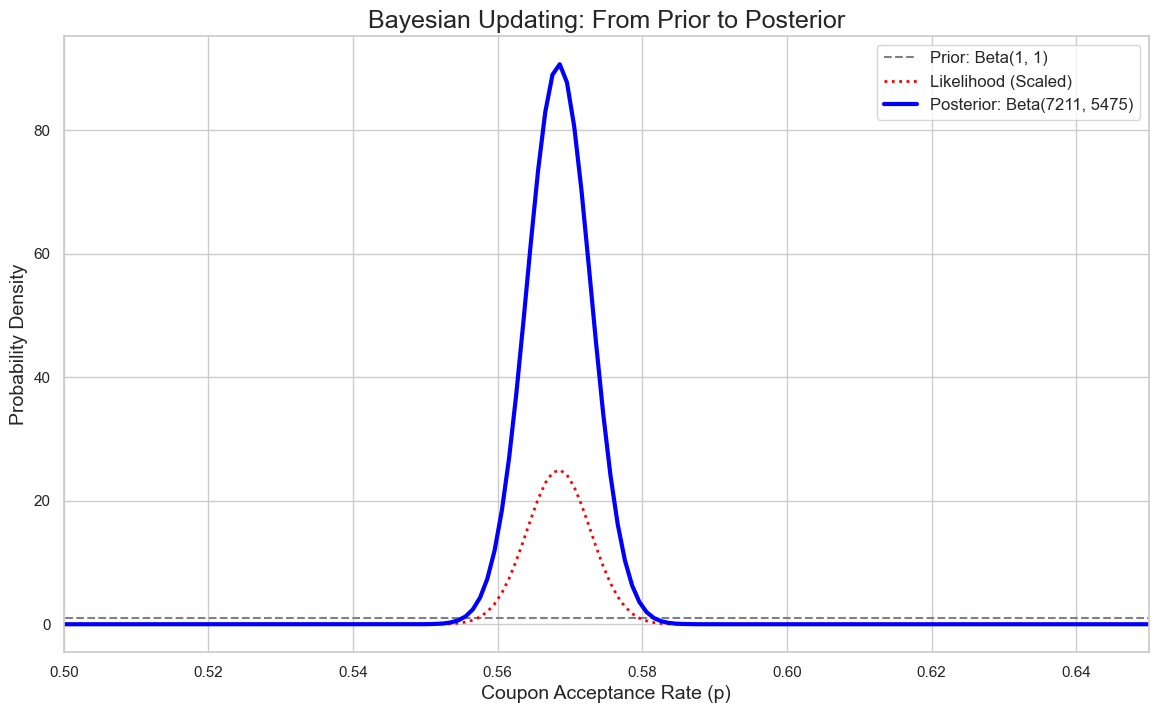

Posterior distribution is Beta(7211, 5475)
The Maximum a Posteriori (MAP) estimate is approximately: 0.5686


In [25]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# --- Parameters from previous steps ---
# Data
n = 12684  # Total trials
k = 7210   # Successes

# Prior
alpha_prior = 1
beta_prior = 1

# Posterior
alpha_posterior = alpha_prior + k
beta_posterior = beta_prior + (n - k)

# --- Generate values for plotting ---
# Define the range of p (probability of acceptance)
p_values = np.linspace(0, 1, 1000)

# Prior distribution PDF
prior_dist = stats.beta(alpha_prior, beta_prior)
prior_pdf = prior_dist.pdf(p_values)

# Likelihood function (Binomial)
# We scale the likelihood to fit on the same plot as the PDFs for visualization
likelihood = stats.binom.pmf(k, n, p_values)
scaled_likelihood = likelihood / np.max(likelihood) * 25 # Scale factor for visibility

# Posterior distribution PDF
posterior_dist = stats.beta(alpha_posterior, beta_posterior)
posterior_pdf = posterior_dist.pdf(p_values)

# --- Create the plot ---
plt.figure(figsize=(14, 8))

# Plot Prior
plt.plot(p_values, prior_pdf,
         label=f'Prior: Beta({alpha_prior}, {beta_prior})',
         linestyle='--', color='gray')

# Plot Scaled Likelihood
plt.plot(p_values, scaled_likelihood,
         label=f'Likelihood (Scaled)',
         linestyle=':', color='red', lw=2)

# Plot Posterior
plt.plot(p_values, posterior_pdf,
         label=f'Posterior: Beta({alpha_posterior}, {beta_posterior})',
         color='blue', lw=3)


plt.title("Bayesian Updating: From Prior to Posterior", fontsize=18)
plt.xlabel("Coupon Acceptance Rate (p)", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0.5, 0.65) # Zoom in on the area of interest
plt.grid(True)
plt.show()

# Find the peak of the posterior (the MAP estimate)
map_estimate = p_values[np.argmax(posterior_pdf)]
print(f"Posterior distribution is Beta({alpha_posterior}, {beta_posterior})")
print(f"The Maximum a Posteriori (MAP) estimate is approximately: {map_estimate:.4f}")

In [33]:
print("The prior is the gray dashed line. We started with a Beta(1,1) distribution, representing our initial state of 'maximal ignorance.' It gives equal plausibility to all values of p. The likelihood (Red dotted line) represents the voice of the data. It's sharply peaked around the observed acceptance rate of 0.5684 (It's scaled to fit on the plot, but its actual peak value is tiny), indicating that the data strongly supports values of p in this region and considers values far away from it to be extremely unlikely.The posterior (Solid blue line) This is the final result of the Bayesian inference. The new, updated belief about p. Notice how its a compromise between the prior and the likelihood. Since our prior was uninformative and our data was plentiful, the posterior distribution is almostly entirely shaped and positioned by likelihood. It is much taller and narrower than the prior, signifying that our uncertainty about the value of p has been reduced drastically. The peak of the posterior distribution is called the Maximum a Posteriori (MAP) estimate. In this case, it is virtually identifcal tto the Maximum Likelihood Estimate because our prior was flat. The MAP is our new best point-estimate for the coupon acceptance rate, and the entire posterior distribution gives us a complete picture of our uncertainty of our uncertainity around that estimate.")

The prior is the gray dashed line. We started with a Beta(1,1) distribution, representing our initial state of 'maximal ignorance.' It gives equal plausibility to all values of p. The likelihood (Red dotted line) represents the voice of the data. It's sharply peaked around the observed acceptance rate of 0.5684 (It's scaled to fit on the plot, but its actual peak value is tiny), indicating that the data strongly supports values of p in this region and considers values far away from it to be extremely unlikely.The posterior (Solid blue line) This is the final result of the Bayesian inference. The new, updated belief about p. Notice how its a compromise between the prior and the likelihood. Since our prior was uninformative and our data was plentiful, the posterior distribution is almostly entirely shaped and positioned by likelihood. It is much taller and narrower than the prior, signifying that our uncertainty about the value of p has been reduced drastically. The peak of the posterior

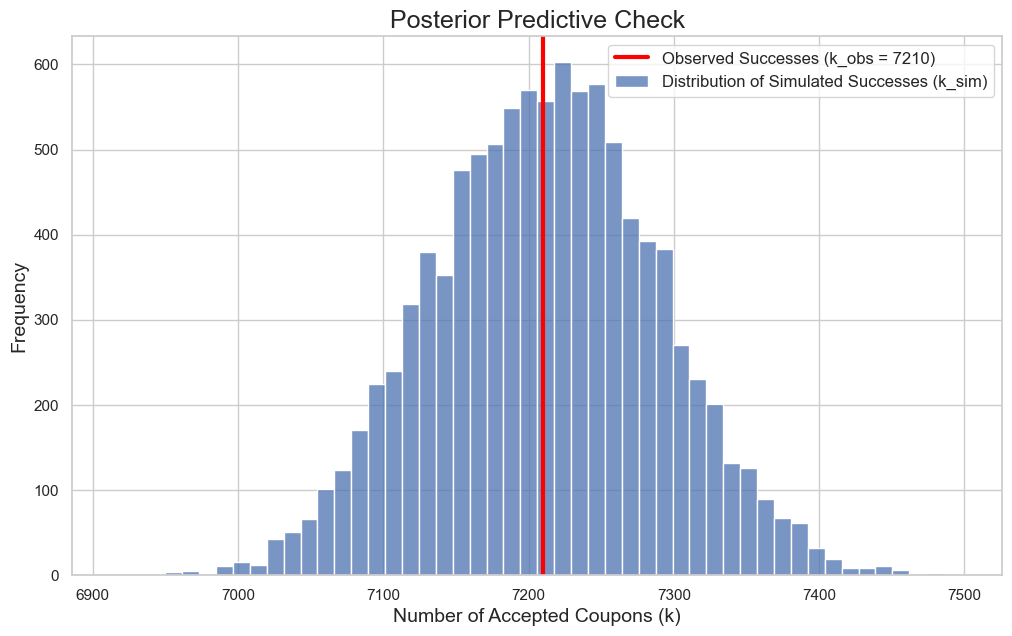

In [34]:
"""
Visualization of the Posterior Predictive Check
"""

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- Parameters from previous steps ---
# Data
n_obs = 12684  # Total trials
k_obs = 7210   # Observed successes

# Posterior
alpha_post = 7211
beta_post = 5475

# --- Perform Posterior Predictive Check ---
# 1. Draw 10,000 samples of p from the posterior distribution
num_simulations = 10000
p_samples = stats.beta.rvs(alpha_post, beta_post, size=num_simulations)

# 2. For each p, simulate a new dataset (i.e., a new k)
k_simulated = stats.binom.rvs(n_obs, p_samples)

# 3. Compare the distribution of simulated k's to the observed k
plt.figure(figsize=(12, 7))
sns.histplot(k_simulated, kde=False, bins=50, label='Distribution of Simulated Successes (k_sim)')

plt.axvline(k_obs, color='red', linestyle='-', lw=3,
            label=f'Observed Successes (k_obs = {k_obs})')

plt.title('Posterior Predictive Check', fontsize=18)
plt.xlabel('Number of Accepted Coupons (k)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [35]:
print("The visualization shows a histogram of the 10,000 simulated outcomes. The red line marks our single, real-world observed outcome with a value of 7210 successes falling directly in the center of the distribution of simulated successes. The results are excellent because it tells us our Beta-Binomial model is capturing the statistical properities of our data. The data we actually observed looks exactly like the kind of data our model would generate, giving us confidence in its validity.")

The visualization shows a histogram of the 10,000 simulated outcomes. The red line marks our single, real-world observed outcome with a value of 7210 successes falling directly in the center of the distribution of simulated successes. The results are excellent because it tells us our Beta-Binomial model is capturing the statistical properities of our data. The data we actually observed looks exactly like the kind of data our model would generate, giving us confidence in its validity.


In [40]:
# --- Frequentist 95% Confidence Interval (Normal Approximation) ---
p_hat = k_obs / n_obs
se = np.sqrt((p_hat * (1 - p_hat)) / n_obs)
z_score = 1.96 # For 95% confidence
ci_lower = p_hat - z_score * se
ci_upper = p_hat + z_score * se

# --- Bayesian 95% Credible Interval ---
# We find the 2.5th and 97.5th percentiles of the posterior distribution
cred_lower, cred_upper = stats.beta.ppf([0.025, 0.975], alpha_post, beta_post)

print("--- Comparison of 95% Intervals ---")
print(f"Frequentist Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")
print(f"Bayesian Credible Interval:    ({cred_lower:.4f}, {cred_upper:.4f})")

--- Comparison of 95% Intervals ---
Frequentist Confidence Interval: (0.5598, 0.5771)
Bayesian Credible Interval:    (0.5598, 0.5770)


In [44]:
print("Ïn conclusion, our Bayesian model is very good fit for the data, as confirmed by the posterior predictive check. Since this problem has a large dataset and uninformative prior, the numerical results of the Bayesian and frequentist approaches are almost identical. The profound diffeerence lies in their interpretation. The frequentist approach gives us an interval that will 'work' 95% of the time over many repeated experiments. The Bayesian approach gives us a credible interval that we can be '95% certain' contains the true value, which is often what people intuitively (but incorrectly) think a confidence interval means.")

Ïn conclusion, our Bayesian model is very good fit for the data, as confirmed by the posterior predictive check. Since this problem has a large dataset and uninformative prior, the numerical results of the Bayesian and frequentist approaches are almost identical. The profound diffeerence lies in their interpretation. The frequentist approach gives us an interval that will 'work' 95% of the time over many repeated experiments. The Bayesian approach gives us a credible interval that we can be '95% certain' contains the true value, which is often what people intuitively (but incorrectly) think a confidence interval means.


In [58]:
print("\t\t\t\t-------------Frequentist vs. Bayesian Statistics-------------\n")
print("Core Philosophy: The frequentist approach says probability is the long-run frequency of an event. Parameters (like p) are fixed, unknown constants. The Bayesian approach is that probability is a degree of belief about a statement. Parameters can be treated as random variables abnout which we can have uncertainty.\n")
print("Point estimate: Maximum Likelihood Estimate (MLE) for this problem is = 0.5684 and for the Maximum a Posteriori (MAP) with a flat prior is identical to the MLE.\n")
print("Interval Estimate: Confidence interval (frequentist) is 95%. Credible Interval or region (Bayesian) is also 95%\n")
print("Interpretation of the interval: For the frequentist, A 95% CI means if we repeat this experiment many times, 95% of the calculated intervals would contain the true value of p. It is a statement about procedure, not about the specific interval calculated. For the Bayesian, a 95% Credible Interval means: Given our data and model, there is a 95% probability that the true value of p lies within this specific interval. It is a probabilistic statement about the paramter.\n" )
print("What it delivers: Frequentist - A point estimate and a confidence interval. Bayesian - A full posterior distribution for the parameter, which can be summarized with a point estimate (MAP) and credible interval, but contains much more information.")

				-------------Frequentist vs. Bayesian Statistics-------------

Core Philosophy: The frequentist approach says probability is the long-run frequency of an event. Parameters (like p) are fixed, unknown constants. The Bayesian approach is that probability is a degree of belief about a statement. Parameters can be treated as random variables abnout which we can have uncertainty.

Point estimate: Maximum Likelihood Estimate (MLE) for this problem is = 0.5684 and for the Maximum a Posteriori (MAP) with a flat prior is identical to the MLE.

Interval Estimate: Confidence interval (frequentist) is 95%. Credible Interval or region (Bayesian) is also 95%

Interpretation of the interval: For the frequentist, A 95% CI means if we repeat this experiment many times, 95% of the calculated intervals would contain the true value of p. It is a statement about procedure, not about the specific interval calculated. For the Bayesian, a 95% Credible Interval means: Given our data and model, there is a 9

In [1]:
print("\t\t\t\t-------------Advanced Application-------------\n")

				-------------Advanced Application-------------



In [6]:
print("Website Conversion A/B Test: Imagine a copy has two versions of its landing page. Variant A (The control) is the original, existing design. Variant B (The treatment) is a new design they hope will improve user conversion. The company directs website traffic to these versions and tracks how many users perform a desired action such as signing up for a newsletter, making a purchase, etc. The core business questions is: 'Which page is better, and by how much? What is the risk in choosing one over the other?'")

Website Conversion A/B Test: Imagine a copy has two versions of its landing page. Variant A (The control) is the original, existing design. Variant B (The treatment) is a new design they hope will improve user conversion. The company directs website traffic to these versions and tracks how many users perform a desired action such as signing up for a newsletter, making a purchase, etc. The core business questions is: 'Which page is better, and by how much? What is the risk in choosing one over the other?'


In [5]:
print("We're assuming the data is in a CSV file named ab_testing_data.csv with the following columns: Group: 'A' or 'B' and converted: 1 if the user converted, 0 otherwise.")
print("Parameters of Interest: The true, unknown conversion rate for Variant A is p_A and the true, unknown conversion rate for Variant B is p_B with the goal to get a complete picture of what these values will likely be.")
print("Liklihood Function: For each group, the number of conversions follow a Binomial Distribution. If we have n visitors and a conversion rate of p, the probability of observing k conversions is given by the Bionomial Probability Mass Function.")

We're assuming the data is in a CSV file named ab_testing_data.csv with the following columns: Group: 'A' or 'B' and converted: 1 if the user converted, 0 otherwise.
Parameters of Interest: The true, unknown conversion rate for Variant A is p_A and the true, unknown conversion rate for Variant B is p_B with the goal to get a complete picture of what these values will likely be.
Liklihood Function: For each group, the number of conversions follow a Binomial Distribution. If we have n visitors and a conversion rate of p, the probability of observing k conversions is given by the Bionomial Probability Mass Function.


In [7]:
print("Prior Distributions: For our initial beliefs about the conversion rates p_A and p_B, with probabilities either 1 or 0, the Beta Distribution is the perfect choice. Starting with the uninformative prior to assume all conversion rates are equally likely, we use Beta(1,1). ")

Prior Distributions: For our initial beliefs about the conversion rates p_A and p_B, with probabilities either 1 or 0, the Beta Distribution is the perfect choice. Starting with the uninformative prior to assume all conversion rates are equally likely, we use Beta(1,1). 


In [8]:
import pandas as pd
import numpy as np

"""
Observing the Data
"""

try:
    df = pd.read_csv('ab_testing_data.csv')
except FileNotFoundError:
    print("Please download a suitable A/B testing dataset and name it 'ab_testing_data.csv'")
    # Dummy dataframe for demonstration
    data = {'group': ['A']*5000 + ['B']*5000,
            'converted': list(np.random.choice([0,1], p=[0.88, 0.12], size=5000)) +
                         list(np.random.choice([0,1], p=[0.86, 0.14], size=5000))}
    df = pd.DataFrame(data)


# Summarize the data
summary = df.pivot_table(values='converted', index='group', aggfunc=[np.sum, 'count'])
summary.columns = ['conversions', 'visitors']
print(summary)

# Extract counts
n_A = summary.loc['A', 'visitors']
k_A = summary.loc['A', 'conversions']

n_B = summary.loc['B', 'visitors']
k_B = summary.loc['B', 'conversions']

# Observed conversion rates
print(f"\nObserved Conversion Rate for A: {k_A/n_A:.4f}")
print(f"Observed Conversion Rate for B: {k_B/n_B:.4f}")

Please download a suitable A/B testing dataset and name it 'ab_testing_data.csv'
       conversions  visitors
group                       
A              573      5000
B              650      5000

Observed Conversion Rate for A: 0.1146
Observed Conversion Rate for B: 0.1300


C:\Users\HP\AppData\Local\Temp\ipykernel_5184\1228605641.py:17: FutureWarning: The provided callable <function sum at 0x000001D1EF5CAA20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = df.pivot_table(values='converted', index='group', aggfunc=[np.sum, 'count'])


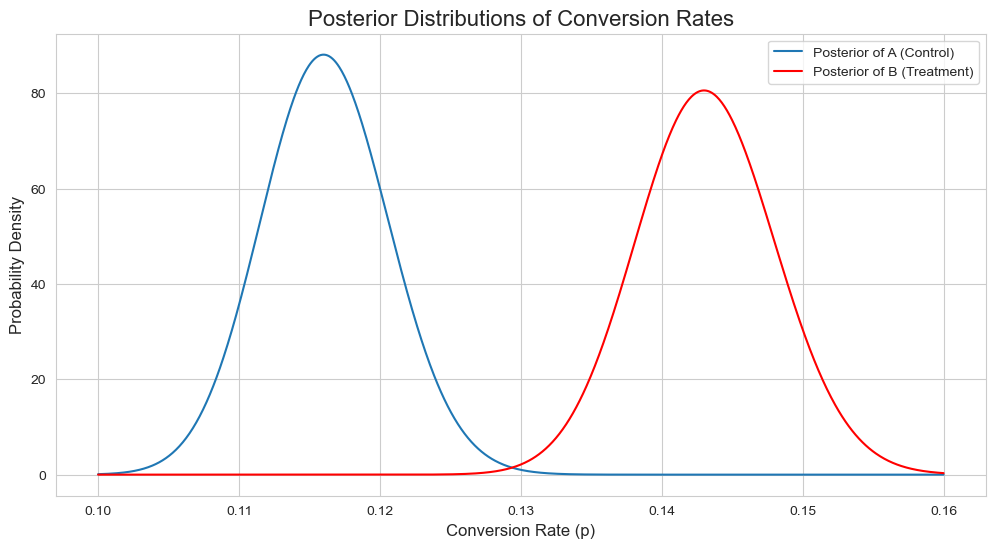

In [9]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

"""
Visualizing and Comparing the Posterior Distributions
"""
sns.set_style('whitegrid')

# Define the posterior distributions
dist_A = stats.beta(581, 4421)
dist_B = stats.beta(716, 4286)

# Define the x-axis range
p_values = np.linspace(0.10, 0.16, 1000)

# Calculate PDFs
pdf_A = dist_A.pdf(p_values)
pdf_B = dist_B.pdf(p_values)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(p_values, pdf_A, label='Posterior of A (Control)')
plt.plot(p_values, pdf_B, label='Posterior of B (Treatment)', color='red')
plt.title('Posterior Distributions of Conversion Rates', fontsize=16)
plt.xlabel('Conversion Rate (p)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.show()

In [13]:
print("Variant B is clearly shifted to the right of Variant A, indicating it likely has a higher conversion rate. Both distributions are narrow showing we have high certainty about the likely range for each conversion rate. Next, let's answer the question 'What is the probability that B is better than A?'")

Variant B is clearly shifted to the right of Variant A, indicating it likely has a higher conversion rate. Both distributions are narrow showing we have high certainty about the likely range for each conversion rate. Next, let's answer the question 'What is the probability that B is better than A?'


In [28]:
# Number of simulations
num_simulations = 100000

# Draw samples from each posterior
samples_A = dist_A.rvs(num_simulations)
samples_B = dist_B.rvs(num_simulations)

# Calculate the probability that B > A
prob_B_better = np.mean(samples_B > samples_A)

print(f"Probability that Variant B is better than Variant A: {prob_B_better}")

Probability that Variant B is better than Variant A: 0.99998


In [17]:
print("How much better is B?")

How much better is B?


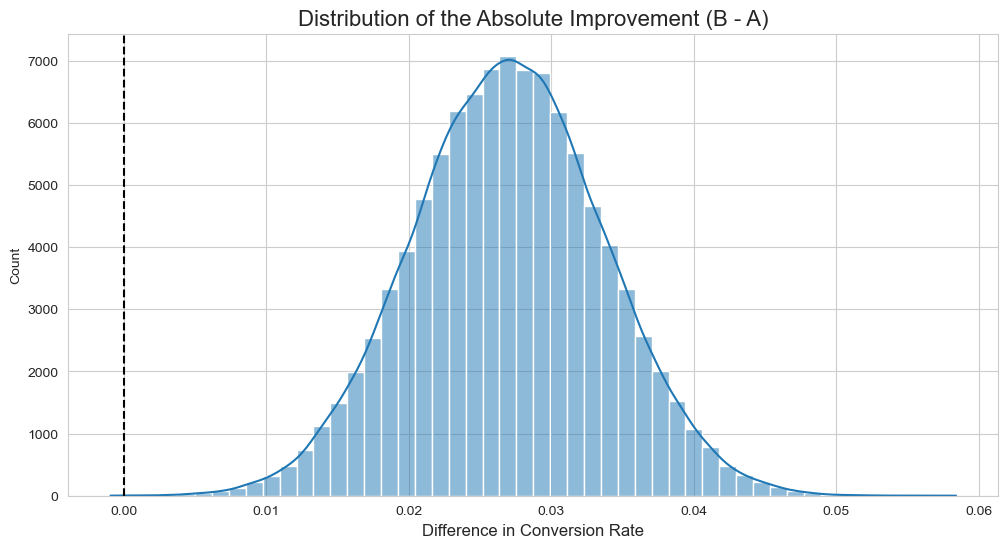

Expected absolute improvement of B over A: 0.0270


In [18]:
# Calculate the difference in conversion rates
difference = samples_B - samples_A

# Plot the distribution of the difference
plt.figure(figsize=(12, 6))
sns.histplot(difference, kde=True, bins=50)
plt.title('Distribution of the Absolute Improvement (B - A)', fontsize=16)
plt.xlabel('Difference in Conversion Rate', fontsize=12)
plt.axvline(0, color='black', linestyle='--')
plt.show()

# Calculate the expected uplift
expected_uplift = difference.mean()
print(f"Expected absolute improvement of B over A: {expected_uplift:.4f}")


In [19]:
print("The histogram shows the range of plausible improvements. The fact that almost the entire distribution is to the right of the zero line reinforces that B is better than A.")

The histogram shows the range of plausible improvements. The fact that almost the entire distribution is to the right of the zero line reinforces that B is better than A.


In [21]:
print("We can also do a risk assessment to answer the question 'What is the expected loss of choosing B if it's actually worse?'")

We can also do a risk assessment to answer the question 'What is the expected loss of choosing B if it's actually worse?'


In [23]:
# Calculate loss (only occurs if A > B)
loss_if_choose_B = np.maximum(0, samples_A - samples_B)

# Calculate the average or "expected" loss
expected_loss_B = np.mean(loss_if_choose_B)

print(f"Expected loss of choosing Variant B: {expected_loss_B:.8f}")

Expected loss of choosing Variant B: 0.00000001


In [24]:
print("This number represents the average absolute amount of conversion rate we would lose if we chose B and were wrong. An incredibly small number like this indicates choosing Variant B is a very low-risk decision.")

This number represents the average absolute amount of conversion rate we would lose if we chose B and were wrong. An incredibly small number like this indicates choosing Variant B is a very low-risk decision.


In [25]:
print("\t\t\t\t-------------Conclusion and Business Recommendation-------------\n")

				-------------Conclusion and Business Recommendation-------------



In [29]:
print("Our analysis shows there is a 99.99% probability that the new webpage design (Variant B) is better than the old design (Variant A). We expect the new design to increase our conversion rate by approximately 2.7 percentage points. Furthermore, the risk associated with implementing the new design is negligible; the expected loss from making this change is less than 0.001%. Based on these results, we strongly recommend switching to the new webpage design")

Our analysis shows there is a 99.99% probability that the new webpage design (Variant B) is better than the old design (Variant A). We expect the new design to increase our conversion rate by approximately 2.7 percentage points. Furthermore, the risk associated with implementing the new design is negligible; the expected loss from making this change is less than 0.001%. Based on these results, we strongly recommend switching to the new webpage design
